In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# importing & Loading Dataset

In [7]:
df = pd.read_csv("LoanApprovalPrediction.csv")

# reading first 5 rows

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(598, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


# finding statistical infp

In [11]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [12]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.drop(columns=["Loan_ID"],axis=1,inplace=True)

In [15]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# EDA

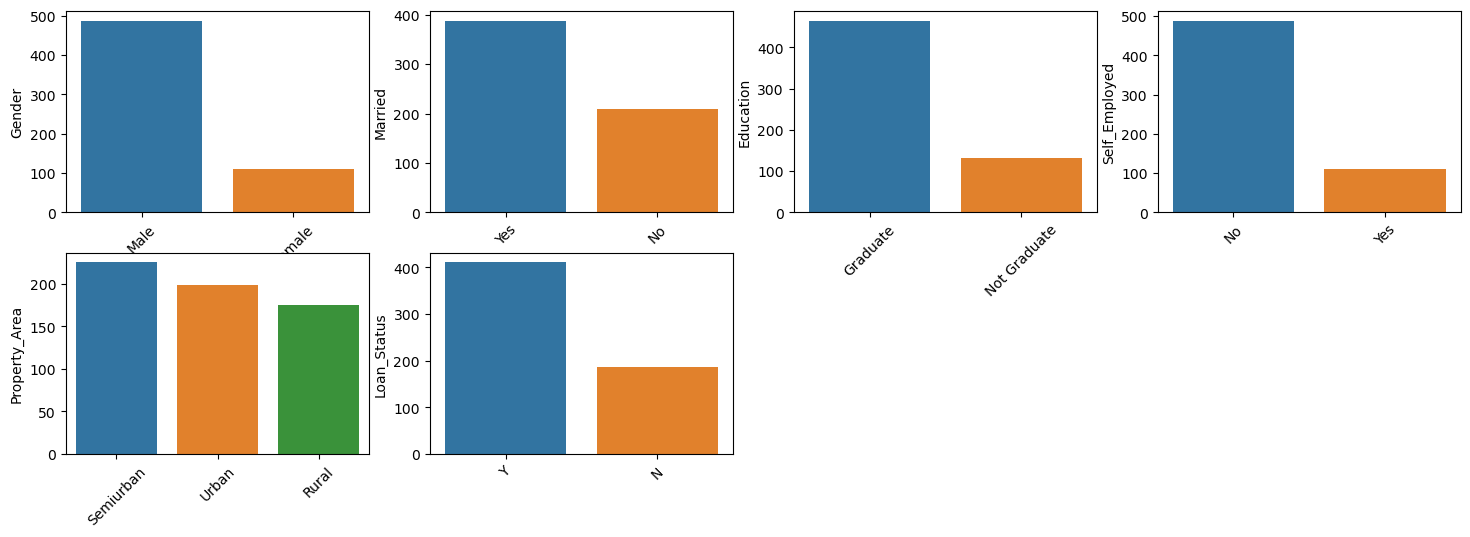

In [16]:
#visualizing the categorical columns
obj = (df.dtypes=='object')
obj_col = list(obj[obj].index)
plt.figure(figsize=(18,34))
index=1

for col in obj_col:
    y = df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=45)
    sns.barplot(x=list(y.index),y=y)
    index += 1

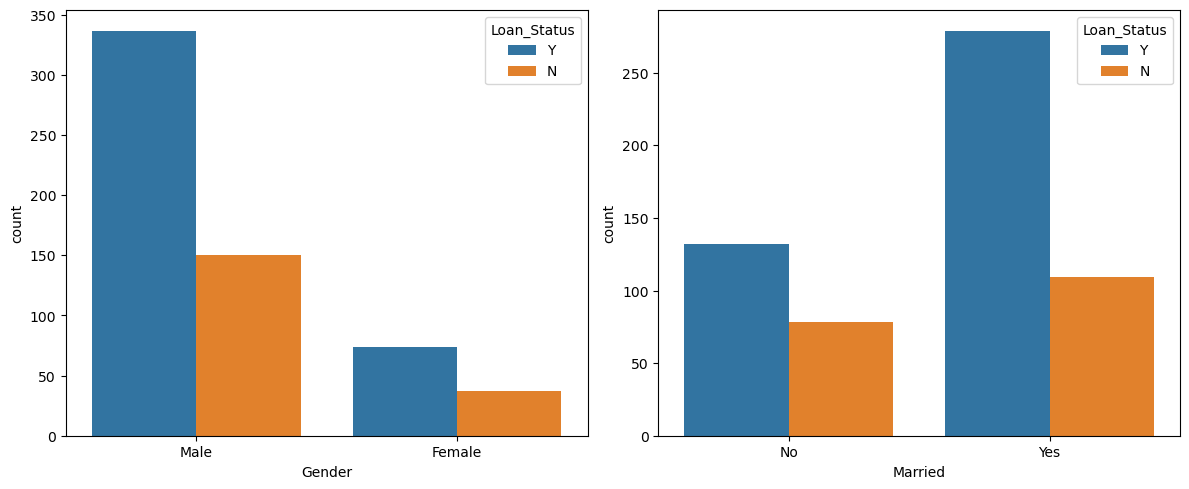

In [17]:
#bivariate analysis
plt.subplots(figsize=(12,5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

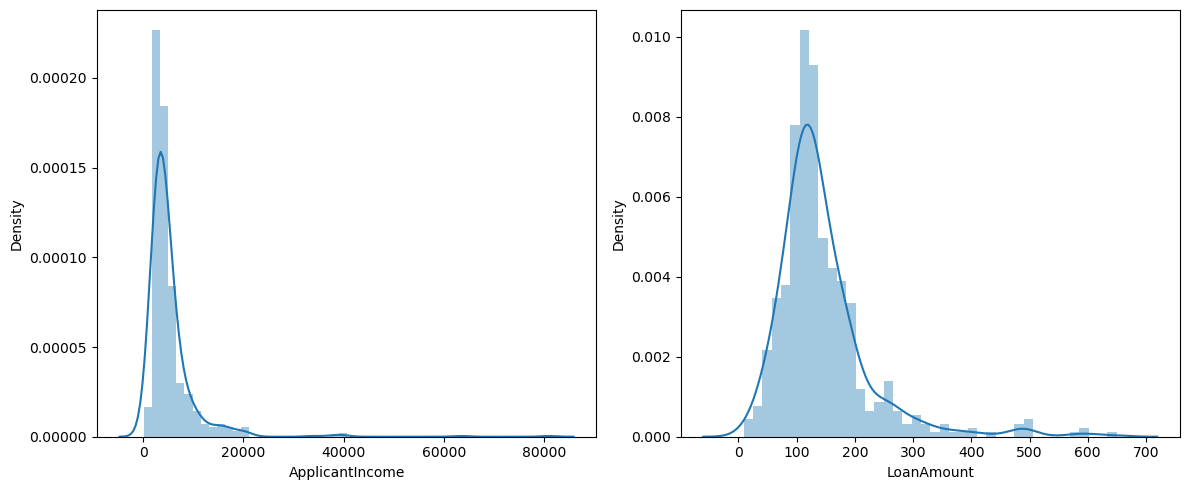

In [18]:
#ApplicantIncome vs LoanAmount
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()

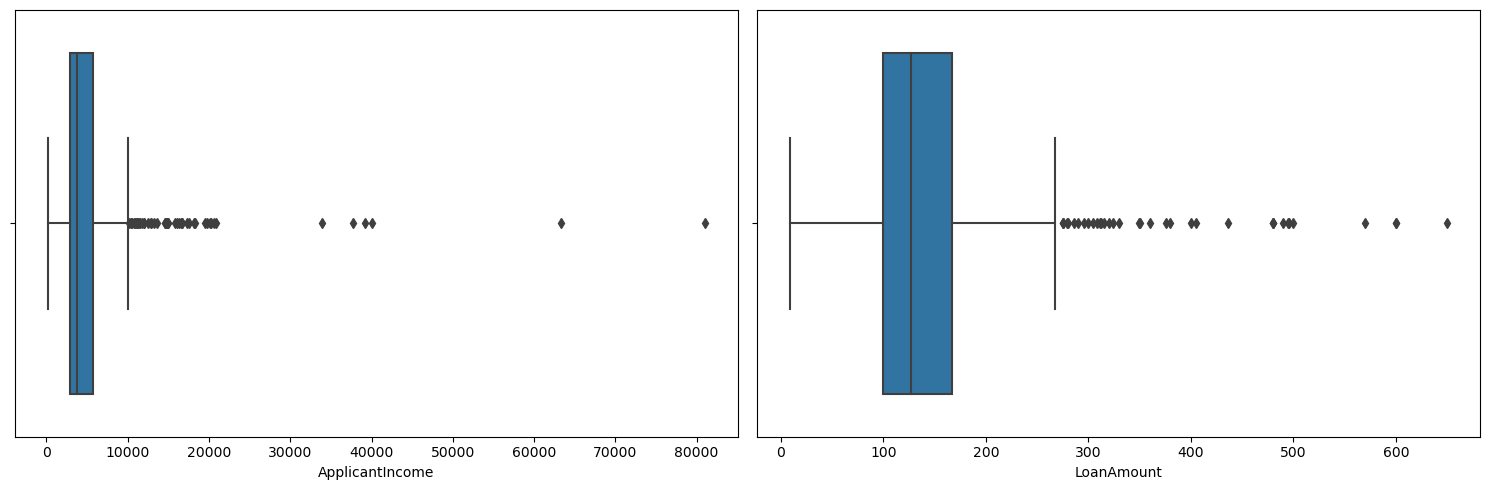

In [19]:
#to find out the outliers for ApplicantIncome vs LoanAmount boxplot is created
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col],orient='horizontal')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [20]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

In [21]:
df.groupby('Gender').mean()['LoanAmount']

Gender
Female    126.697248
Male      146.872294
Name: LoanAmount, dtype: float64

In [22]:
#mean amount of loan granted to both male & female as well married or unmarried
df.groupby(['Married','Gender']).mean()['LoanAmount']

Married  Gender
No       Female    116.115385
         Male      135.959677
Yes      Female    153.322581
         Male      150.875740
Name: LoanAmount, dtype: float64

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_encoder.fit_transform(df[col])

In [24]:
obj = (df.dtypes == 'object')
print("Ctegorical variables:",len(list(obj[obj].index)))

Ctegorical variables: 0


<AxesSubplot:>

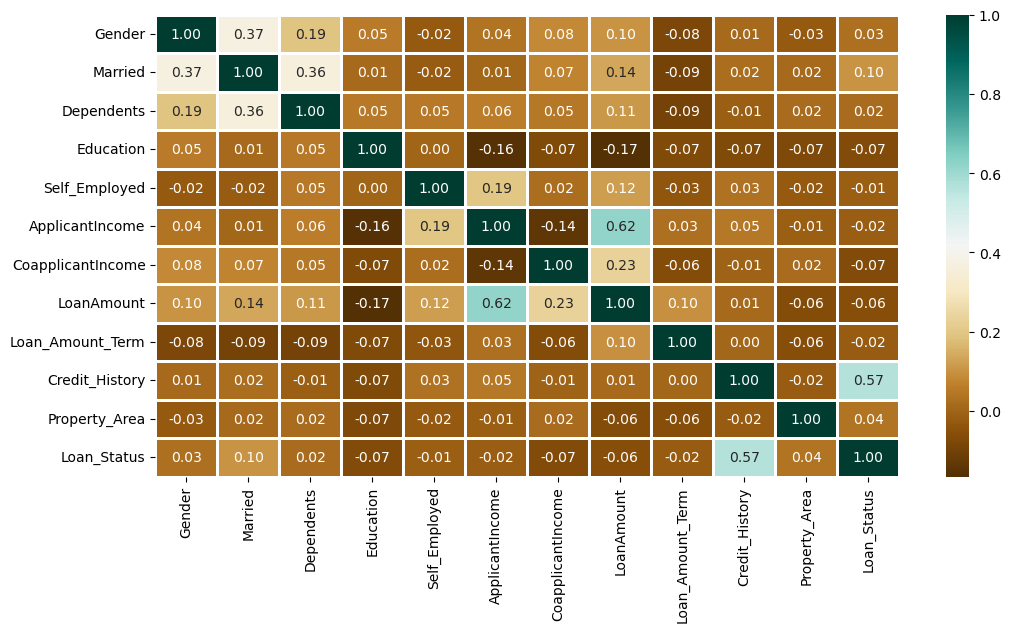

In [25]:
#plotting heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

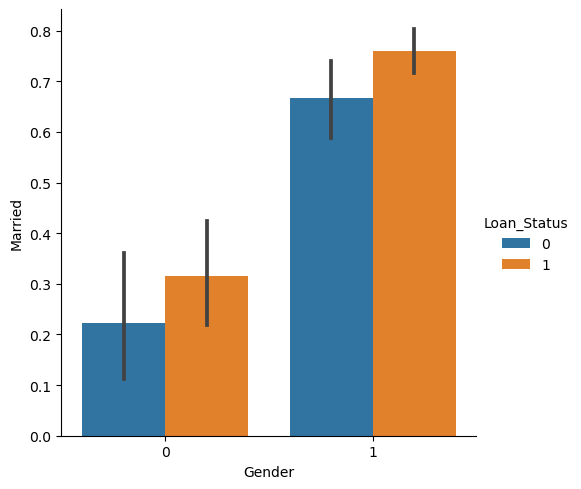

In [26]:
sns.catplot(x='Gender', y='Married', hue='Loan_Status',kind="bar",data=df)

In [27]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data splitting

In [29]:
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((342, 11), (229, 11), (342,), (229,))

# model building

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 7)
svc = SVC()
lc = LogisticRegression()

#making predictions on test set
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print("Accuracy score of",
         clf.__class__.__name__,
         "=",100*metrics.accuracy_score(y_train,y_pred))


Accuracy score of RandomForestClassifier = 100.0
Accuracy score of KNeighborsClassifier = 73.39181286549707
Accuracy score of SVC = 67.2514619883041
Accuracy score of LogisticRegression = 79.82456140350878


In [31]:
#making predictions on test set
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of ",
        clf.__class__.__name__,"=",
        100*metrics.accuracy_score(y_test,y_pred))


Accuracy score of  RandomForestClassifier = 84.27947598253274
Accuracy score of  KNeighborsClassifier = 67.24890829694323
Accuracy score of  SVC = 72.48908296943232
Accuracy score of  LogisticRegression = 84.71615720524017


In [26]:
from sklearn.linear_model import LogisticRegression

lc = LogisticRegression()
lc.fit(X_train, y_train)



LogisticRegression()

In [27]:
# Step 1: Train-test split
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(342, 11) (229, 11) (342,) (229,)


In [28]:
# Step 2: Train models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression()

for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of", clf.__class__.__name__, "=", 100 * metrics.accuracy_score(y_test, y_pred))


Accuracy score of RandomForestClassifier = 84.27947598253274
Accuracy score of KNeighborsClassifier = 67.24890829694323
Accuracy score of SVC = 72.48908296943232
Accuracy score of LogisticRegression = 84.71615720524017


In [29]:
# Step 3: Save the best model (Logistic Regression)
import joblib

joblib.dump(lc, 'loan_model.pkl')


['loan_model.pkl']

In [1]:
import os
os.getcwd()


'C:\\Users\\kavya\\PROJECT'